# Memory Preprocessing

In [1]:
from pandas import DataFrame
from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot

set_option('display.max_columns', 50)

In [2]:
df = read_csv('memory.csv', header=0)
df.head()

,@timestamp,system.memory.used.pct,system.memory.actual.used.pct,system.memory.swap.used.pct
0,"September 28th 2018, 09:37:37.546",80.73%,51.3%,3.99%
1,"September 28th 2018, 09:37:38.896",80.8%,51.37%,3.99%
2,"September 28th 2018, 09:37:47.547",80.44%,51%,3.99%
3,"September 28th 2018, 09:37:57.547",80.73%,51.27%,3.99%
4,"September 28th 2018, 09:38:07.547",80.91%,51.45%,3.99%


## Remove Presentage Marks

In [3]:
for i in range(df.shape[1]):
    selected_col = df.iloc[:, i]
    col_type = type(selected_col[0])
    
    if(col_type == str):
        if(selected_col.iloc[0].endswith('%')):
            df.iloc[:, i] = df.iloc[:, i].str.rstrip('%').astype('float') / 100.0

df.head()

,@timestamp,system.memory.used.pct,system.memory.actual.used.pct,system.memory.swap.used.pct
0,"September 28th 2018, 09:37:37.546",0.8073,0.5130,0.0399
1,"September 28th 2018, 09:37:38.896",0.8080,0.5137,0.0399
2,"September 28th 2018, 09:37:47.547",0.8044,0.5100,0.0399
3,"September 28th 2018, 09:37:57.547",0.8073,0.5127,0.0399
4,"September 28th 2018, 09:38:07.547",0.8091,0.5145,0.0399


In [4]:
df.to_csv("memory-cleaned.csv");

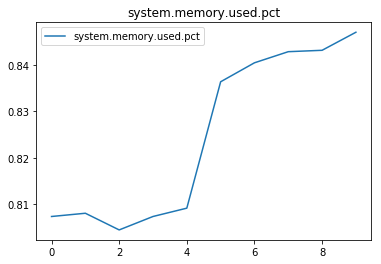

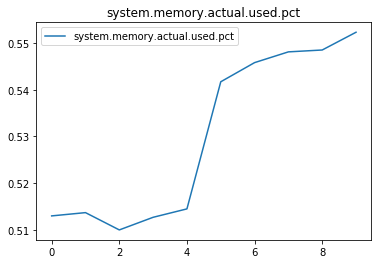

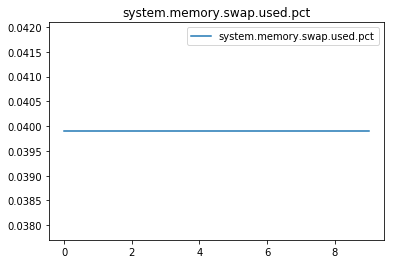

In [5]:
for i in range(1, df.shape[1]):
    pyplot.plot(df[df.columns[i]], label=df.columns[i])
    pyplot.legend()
    pyplot.title(df.columns[i])
    pyplot.show()